# Data Plotting

Based on the tutorial https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py

In [30]:
# Magic macro to make plots show up in the notebook.
%matplotlib inline

In [31]:
import matplotlib.pyplot as plt
import math
import numpy as np

Define a data set

In [32]:
x = np.arange(100)
y = np.exp(-x/10) * np.tanh(x / 50) * 10
z = np.exp(-x/5) * np.sin(np.pi * x / 5)

## Plotting Using Global State

# Using the global state environment.
plt.plot(y)  # x values not given, pyplot assumes [0, 1, 2, 3, 4]
plt.plot(z)  # adds a curve onto the current axes
plt.ylabel('squares')
# display the plot
plt.show()

## Plotting Using the Object API

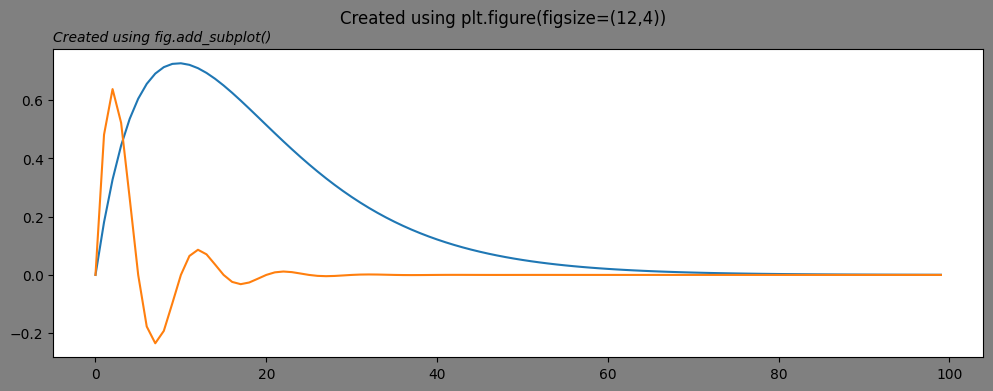

In [29]:
# 1. Create a Figure - the matplotlib.pyplot (plt) interface spins up the Backend.
fig = plt.figure(figsize=(12,4), facecolor="grey")
fig.suptitle("Created using plt.figure(figsize=(12,4))")
# 2. Add an Axes (Artist) to the figure.
axes = fig.add_subplot()
axes.set_title("Created using fig.add_subplot()", loc="left", fontstyle="oblique", fontsize="medium")
# 3. Add 2 Line2D to the axes https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D
y_chart = axes.plot(x, y)
z_chart = axes.plot(x, z)

### Multiple charts in one Figure

2 Axes(0.125,0.11;0.352273x0.77)


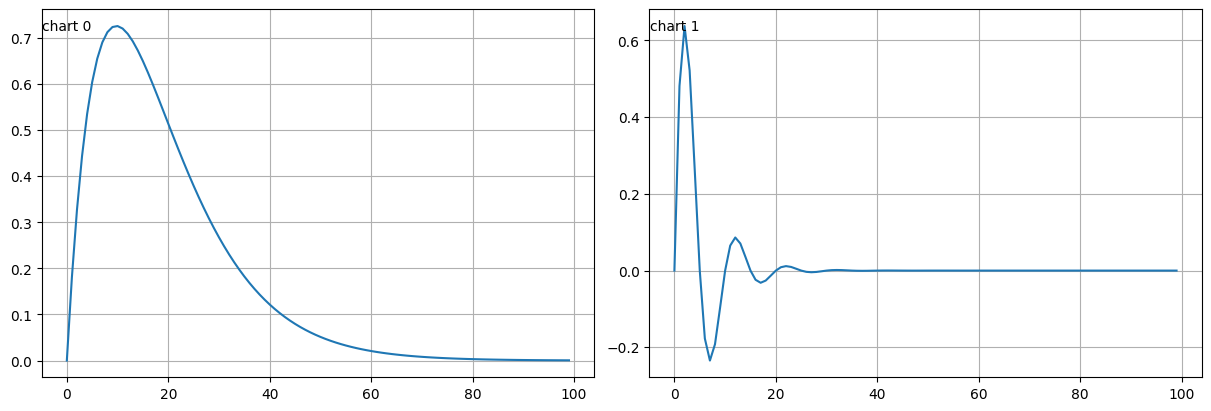

In [66]:
multi_fig, multi_axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), layout="constrained")
print(len(multi_axes), multi_axes[0])
# for each Axes, add an artist
for col in range(2):
    chart = multi_axes[col]
    chart.plot(x, y if col == 0 else z)  # creates a Line2D on this chart.
    chart.grid(visible=True)
    chart.annotate(f"chart {col}", (0, chart.dataLim.ymax), transform=chart.transAxes, ha="center", va="center")


## Format Control

Give x values explicitly.
* if given, x values come first
* 3rd arg is plot style
* for multiple plots, give a tuple for each.
* see [`plot` documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

In [ ]:
x = [math.pi * 0.02 * t for t in range(100)]
y = [math.cosh(t) for t in x]
z = [math.sin(t) * 100 for t in x]
plt.plot(x, y, 'ro', x, z, 'g.')  # if given, x values come first.  3rd arg is plot style.  For multiple plots, give tuple for each.
plt.axis( (0, 7, -200, 200) )  # Specify the viewport of the Axes with a tuple/list.
plt.show()

## Data from `numpy` Arrays

Actually all given sequences are internally converted to `numpy` arrays.

In [ ]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# Plotting with Keyword Strings

Sometimes data is in a format allowing access particular variables with strings. For example, with [`numpy` structured arrays](https://numpy.org/doc/stable/user/basics.rec.html#structured-arrays) or [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame).

Matplotlib allows you to provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

In [ ]:
# Define a table with columns a, b, c, d
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100
# Create a scatter plot, referencing column names, and with the data= named arg.
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

## Categorical Variables

* Use [`plt.figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure) to create a new [`Figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure).
* `figsize` argument is the dimensions (width, height) in inches.
* Use [`plt.subplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot) to add an Axes to the current figure.
* 3-digit integer becomes the (nrows, ncols, index) tuple, ie. 132 = grid of 1 row, 3 cols, 2nd position.
* Bar chart: [`plt.bar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)
* Scatter plot: [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)
* XY plot: [`plt.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

In [ ]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
# figure doc https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
plt.figure(figsize=(12, 3))  # Width, height in inches
# subplot doc https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
plt.subplot(131)  # same as subplot(1, 3, 1)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Multiple Figures and Axes

* concept of the current figure and the current [`Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes).
* plotting functions apply to the current Axes.
* [`gca`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gca.html#matplotlib.pyplot.gca) returns the current [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes)
* [`gcf`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.gcf.html#matplotlib.pyplot.gcf) returns the current [`matplotlib.figure.Figure`](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure).

Creating two subplots:

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 10.0, 0.02)

plt.figure()

plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.grid(True)

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.grid(True)

plt.show()